#Data Processing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/Thesis/Git_repo') # select position of repo
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from utils_data.data_processing_functions import combine_txt

In [0]:
#input files to combine
files=['/content/drive/My Drive/Thesis/Data/combined_data_1.txt','/content/drive/My Drive/Thesis/Data/combined_data_2.txt', 
           '/content/drive/My Drive/Thesis/Data/combined_data_3.txt', '/content/drive/My Drive/Thesis/Data/combined_data_4.txt']

outpath = '/content/drive/My Drive/Thesis/Git_repo/Data/'
out_file_name = "Data_combined.csv"

combine_txt(files,outpath,out_file_name)

In [0]:
df = pd.read_csv('/content/drive/My Drive/Thesis/Git_repo/Data/Data_combined.csv',sep=',', usecols=[0,1,2],names=["movieID","userID","rating"])[["userID","movieID","rating"]]

In [6]:
df.head()

,userID,movieID,rating
0,1488844,1,3
1,822109,1,5
2,885013,1,4
3,30878,1,4
4,823519,1,3


In [0]:
df.to_csv("/content/drive/My Drive/Thesis/Git_repo/Data/Data_combined_v.2.csv",index=False)

## Sample randomly from the whole dataset

In [0]:
data = pd.read_csv("/content/drive/My Drive/Thesis/Git_repo/Data/Data_combined_v.2.csv")

In [12]:
data.head()

,userID,movieID,rating
0,1488844,1,3
1,822109,1,5
2,885013,1,4
3,30878,1,4
4,823519,1,3


In [0]:
n = 100480507 #total of records in file --> FIXED
s = 1000000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s))
data = pd.read_csv("/content/drive/My Drive/Thesis/Git_repo/Data/Data_combined_v.2.csv",skiprows=skip)

In [0]:
# Save random sampled dataset
data.to_csv("/content/drive/My Drive/Thesis/Git_repo/Data/Rsample_1M.csv",index=False)

## Create traning, validation and test set

In [0]:
data_1M = pd.read_csv("/content/drive/My Drive/Thesis/Git_repo/Data/Rsample_1M.csv")

In [10]:
data_1M.head()

,userID,movieID,rating
0,1567202,1,2
1,55016,1,3
2,1348967,1,2
3,320540,1,2
4,1077982,1,4


In [0]:
# shuffle the dataframe
shuffled_data = data_1M.sample(frac=1)

In [12]:
shuffled_data.head()

,userID,movieID,rating
923544,2153796,16439,4
131479,466778,2510,5
546706,142936,10042,5
373554,1926202,6692,4
594820,1361756,11013,4


In [0]:
#split
msk = np.random.rand(len(shuffled_data)) < 0.8
train_val = shuffled_data[msk]
test = shuffled_data[~msk]

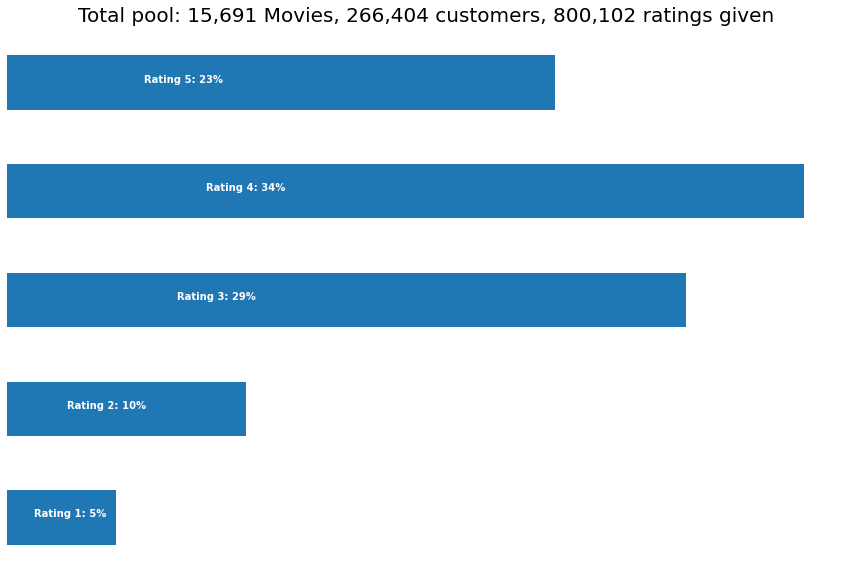

In [15]:
#train distribution
p = train_val.groupby('rating')['rating'].agg(['count']) # count
rating_count = train_val['rating'].count()
movie_count = train_val['movieID'].nunique()
cust_count = train_val['userID'].nunique()
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')
for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i,
                                      p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

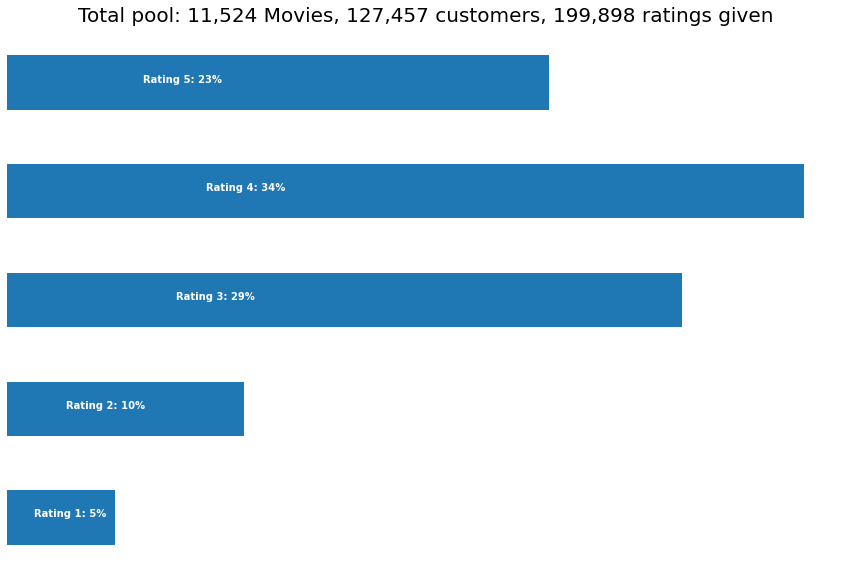

In [16]:
#test distribution
p = test.groupby('rating')['rating'].agg(['count']) # count
rating_count = test['rating'].count()
movie_count = test['movieID'].nunique()
cust_count = test['userID'].nunique()
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')
for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i,
                                      p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

Save train and test

In [0]:
train_val.to_csv("/content/drive/My Drive/Thesis/Git_repo/Data/train_val.csv",index=False)

In [0]:
test.to_csv("/content/drive/My Drive/Thesis/Git_repo/Data/test.csv",index=False)

Create validation set

In [0]:
train_val = pd.read_csv("/content/drive/My Drive/Thesis/Git_repo/Data/train_val.csv")

In [0]:
#split
msk = np.random.rand(len(train_val)) < 0.8
train = train_val[msk]
val = train_val[~msk]

In [0]:
train.to_csv("/content/drive/My Drive/Thesis/Git_repo/Data/train.csv",index=False)

In [0]:
val.to_csv("/content/drive/My Drive/Thesis/Git_repo/Data/validation.csv",index=False)